In [12]:
from gwsnr import GWSNR
import jax.numpy as jnp
from jax import jit, vmap
import numpy as np
gwsnr = GWSNR()


Initializing GWSNR class...

psds not given. Choosing bilby's default psds
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_3.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/partialSNR_dict_3.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/partialSNR_dict_3.pickle

Chosen GWSNR initialization parameters:

npool:  4
snr type:  interpolation_no_spins
waveform approximant:  IMRPhenomD
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  9.96
max(mtot) (with the given fmin=20.0): 235.0
detectors:  ['L1', 'H1', 'V1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt'), PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/

In [15]:
# 1D interpolation of gwsnr.psds_list[0].frequency_array, gwsnr.psds_list[0].psd_array, with jax
import jax.numpy as jnp
from jax import jit
# force 64-bit precision for consistency with NumPy
import jax
jax.config.update("jax_enable_x64", True)

# Convert the numpy arrays to JAX arrays. 
# JAX functions can often handle NumPy arrays directly, but it's good 
# practice to convert them if you plan to do more JAX operations.
xp = jnp.array(gwsnr.psds_list[0].frequency_array)
fp = jnp.array(gwsnr.psds_list[0].psd_array)

# 2. Define the new frequencies where you want to calculate the PSD
# These can be any points within the range of original_freqs
new_frequencies = jnp.array([25.5, 50.1, 100.0, 450.7, 1000.2])

# 3. Perform the interpolation using JAX
interpolated_psds = jnp.interp(new_frequencies, xp, fp)

# The result is a JAX device array with the interpolated values
print("New Frequencies:\n", new_frequencies)
print("\nInterpolated PSDs:\n", interpolated_psds)

New Frequencies:
 [  25.5   50.1  100.   450.7 1000.2]

Interpolated PSDs:
 [1.67934818e-46 3.01361573e-47 1.54150217e-47 9.84701372e-48
 2.08786989e-47]


In [17]:
gwsnr.psds_list[0].get_power_spectral_density_array(new_frequencies)

array([1.67934818e-46, 3.01361573e-47, 1.54150217e-47,
       9.84701372e-48, 2.08786989e-47])

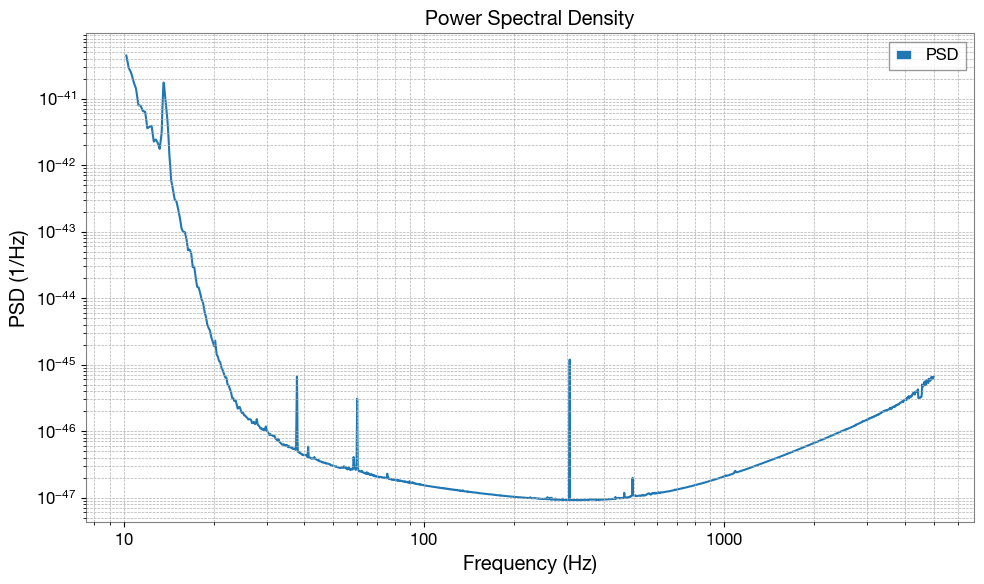

In [6]:
# plot gwsnr.psds_list[0].frequency_array with gwsnr.psds_list[0].psd_array
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
plt.plot(gwsnr.psds_list[0].frequency_array, gwsnr.psds_list[0].psd_array, label='PSD', color='C0')
f_array_new = 
plt.plot(gwsnr.psds_list[0].frequency_array, gwsnr.psds_list[0].psd_array, label='PSD', color='C0')

plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (1/Hz)')
plt.title('Power Spectral Density')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
def arg_selection(waveform_name):
        """
        Returns the list of arguments required for the chosen waveform.

        Parameters
        ----------
        waveform_name: `str`
            The name of the waveform to use. Ripple supported waveforms only.
        
        Returns
        -------
        list: List of arguments required for the chosen waveform.
        """

        supported_waveforms = ['IMRPhenomXAS', 'IMRPhenomD', 'TaylorF2', 'IMRPhenomD_NRTidalv2']

        if waveform_name == 'IMRPhenomXAS':
            return ['Mchirp', 'eta', 'a_1', 'a_2', 'luminosity_distance', 'tc', 'phase', 'theta_jn']
        elif waveform_name == 'IMRPhenomD':
            return ['Mchirp', 'eta', 'a_1', 'a_2', 'luminosity_distance', 'tc', 'phase', 'theta_jn']
        elif waveform_name == 'TaylorF2':
            return ['Mchirp', 'eta', 'a_1', 'a_2', 'lambda_1', 'lambda_2','luminosity_distance', 'tc', 'phase', 'theta_jn']
        elif waveform_name == 'IMRPhenomD_NRTidalv2':
            return ['Mchirp', 'eta', 'a_1', 'a_2', 'lambda_1', 'lambda_2','luminosity_distance', 'tc', 'phase', 'theta_jn']
        else:
            raise ValueError(f"Waveform '{waveform_name}' not supported by ripple. Supported waveforms are: {supported_waveforms}")

def waveform_generator(waveform_name):
    """
    Imports and returns the specified waveform from ripple.waveforms.

    Parameters:
    waveform_name (str): The name of the waveform to import.

    Returns:
    class: The waveform class from ripple.waveforms.
    """

    try:
        # Import inside the function
        waveform_module = __import__('ripple.waveforms', fromlist=[waveform_name])
        mod_ = getattr(waveform_module, waveform_name)
        attr_ = "gen_"+waveform_name+"_hphc"
        return getattr(mod_, attr_)
    except AttributeError:
        raise ValueError(f"Waveform '{waveform_name}' not found in ripple.waveforms module.")

In [8]:
# setting up the inputs
mass_1=10
mass_2=10
luminosity_distance=100.0
theta_jn=0.0
psi=0.0
phase=0.0
geocent_time=1246527224.169434
ra=0.0
dec=0.0
a_1=0.0
a_2=0.0
tilt_1=0.0
tilt_2=0.0
phi_12=0.0
phi_jl=0.0
gw_param_dict=False

# if gw_param_dict is given, then use that
from gwsnr.utils import get_gw_parameters

if gw_param_dict is not False:
    mass_1, mass_2, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec, a_1, a_2, tilt_1, tilt_2, phi_12, phi_jl, _, _, _ = get_gw_parameters(gw_param_dict)
else:
    mass_1, mass_2, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec, a_1, a_2, tilt_1, tilt_2, phi_12, phi_jl, _, _, _ = get_gw_parameters(dict(mass_1=mass_1, mass_2=mass_2, luminosity_distance=luminosity_distance, theta_jn=theta_jn, psi=psi, phase=phase, geocent_time=geocent_time, ra=ra, dec=dec, a_1=a_1, a_2=a_2, tilt_1=tilt_1, tilt_2=tilt_2, phi_12=phi_12, phi_jl=phi_jl))

mtot = mass_1 + mass_2
idx = (mtot >= gwsnr.mtot_min) & (mtot <= gwsnr.mtot_max)
size = np.sum(idx)
# size1 = np.sum(idx)
# iterations = np.arange(size1)  # to keep track of index

# input arrays
mass_1 = jnp.array(mass_1[idx])
mass_2 = jnp.array(mass_2[idx])
luminosity_distance = jnp.array(luminosity_distance[idx])
theta_jn = jnp.array(theta_jn[idx])
psi = jnp.array(psi[idx])
phase = jnp.array(phase[idx])
geocent_time = jnp.array(geocent_time[idx])
ra = jnp.array(ra[idx])
dec = jnp.array(dec[idx])
a_1 = jnp.array(a_1[idx])
a_2 = jnp.array(a_2[idx])
# tilt_1 = jnp.array(tilt_1[idx])
# tilt_2 = jnp.array(tilt_2[idx])
# phi_12 = jnp.array(phi_12[idx])
# phi_jl = jnp.array(phi_jl[idx])

In [9]:
detector_tensor = jnp.array(gwsnr.detector_tensor_list.copy())
# get the psds for the required detectors
psd_list = gwsnr.psds_list.copy()
num_det = len(psd_list)
num = len(mass_1)

f_u = gwsnr.sampling_frequency/2
f_l = gwsnr.f_min
f_ref = f_l

In [10]:
mass_1=10
mass_2=10
luminosity_distance=100.0
theta_jn=0.0
psi=0.0
phase=0.0
geocent_time=1246527224.169434
ra=0.0
dec=0.0
a_1=0.0
a_2=0.0

In [ ]:
from jax import vmap, jit
from gwsnr.jax import findchirp_chirptime_jax
from ripple import ms_to_Mc_eta

duration_max = 64.
duration_min = 4.

waveform_approximant = 'IMRPhenomXAS'
# parameter_names = arg_selection(waveform_approximant)

waveform_generator_buffer = jit(waveform_generator(waveform_approximant))
# vmap_waveform_generator = vmap(jit(waveform_generator_buffer), in_axes=(None,0,None))
# vmap_findchirp_chirptime = vmap(findchirp_chirptime_jax)

# set up waveform calculator inputs
Mchirp, eta = jnp.array(ms_to_Mc_eta(jnp.array([mass_1, mass_2])), dtype=jnp.float32)
tc = 0.
# 'Mchirp', 'eta', 'a_1', 'a_2', 'luminosity_distance', 'tc', 'phase', 'theta_jn'
theta_ripple = jnp.array([Mchirp, eta, a_1, a_2, luminosity_distance, tc, phase, theta_jn]).T

safety = 1.1
approx_duration = safety * findchirp_chirptime_jax(mass_1, mass_2, f_l)  # vmap result give you a stack which is 2D JAX array
duration = np.ceil(approx_duration + 2.0).flatten()  # coverts to numpy 1D array
duration = jnp.clip(duration, duration_min, duration_max)

# Frequency array calculation for each of the mass combination

In [13]:
np.ceil(approx_duration + 2.0).flatten()

array([9.], dtype=float32)

In [21]:
# Frequency array calculation for each of the mass combination
del_f = 1.0 / duration[0]  # Extract scalar from array
fs = jnp.arange(f_l, f_u + del_f, del_f)

In [22]:
# input = theta_ripple[0]
# hp, hc = waveform_generator_buffer(fs, input, f_ref)
hp, hc = waveform_generator_buffer(fs, theta_ripple, f_ref)
# hp, hc = vmap_waveform_generator(fs[0], theta_ripple, f_ref)
hp

Array([-9.8452719e-23-9.8454871e-23j,
       -2.9198680e-23+1.3520047e-22j,
        1.2538600e-22-5.6215667e-23j, ...,
       -4.7441661e-25-8.4469734e-26j,
       -4.7390765e-25-8.3916638e-26j,
       -4.7339863e-25-8.3364682e-26j], dtype=complex64)

In [234]:

def add(a, b):
    return a + b

def multiply(a, b):
    return add(a, b) * b

jit(multiply)(2, 3)

Array(15, dtype=int64, weak_type=True)

In [231]:
vmap_multiply = vmap(jit(multiply), in_axes=(0, 0))
vmap_multiply(jnp.array([1, 2, 3]), jnp.array([4, 5, 6]))

Array([20, 35, 54], dtype=int64)

In [23]:
duration_max = 64.
duration_min = 4.

# set up waveform calculator inputs
from gwsnr.jax import findchirp_chirptime_jax
from ripple import ms_to_Mc_eta
Mchirp, eta = jnp.array(ms_to_Mc_eta(jnp.array([mass_1, mass_2])), dtype=jnp.float32)
tc = 0.
# 'Mchirp', 'eta', 'a_1', 'a_2', 'luminosity_distance', 'tc', 'phase', 'theta_jn'
theta_ripple = jnp.array([Mchirp, eta, a_1, a_2, luminosity_distance, tc, phase, theta_jn])

safety = 1.1
approx_duration = safety * findchirp_chirptime_jax(mass_1, mass_2, f_l)  # vmap result give you a stack which is 2D JAX array
duration = np.ceil(approx_duration + 2.0).flatten()  # coverts to numpy 1D array
duration = jnp.clip(duration, duration_min, duration_max)

# Frequency array calculation for each of the mass combination
del_f = 1.0 / duration[0]  # Extract scalar from array
fs = jnp.arange(f_l, f_u + del_f, del_f)

hp, hc = waveform_generator_buffer(fs, theta_ripple, f_ref)

In [24]:
hp

Array([-9.8452719e-23-9.8454871e-23j,
       -2.9198680e-23+1.3520047e-22j,
        1.2538600e-22-5.6215667e-23j, ...,
       -4.7441661e-25-8.4469734e-26j,
       -4.7390765e-25-8.3916638e-26j,
       -4.7339863e-25-8.3364682e-26j], dtype=complex64)

In [9]:
from gwsnr.ripple import RippleInnerProduct
from jax import vmap, jit
from jax import numpy as jnp
from ripple import ms_to_Mc_eta

test = RippleInnerProduct()

In [13]:
mass_1=10
mass_2=10
luminosity_distance=100.0
theta_jn=0.0
psi=0.0
phase=0.0
geocent_time=1246527224.169434
ra=0.0
dec=0.0
a_1=0.0
a_2=0.0
hp, hc = test.waveform_polarization(mass_1, mass_2, luminosity_distance, theta_jn, phase, a_1, a_2)
hp

ValueError: vmap was requested to map its argument along axis 0, which implies that its rank should be at least 1, but is only 0 (its shape is ())

In [14]:
# setting up the inputs
mass_1=10
mass_2=10
luminosity_distance=100.0
theta_jn=0.0
psi=0.0
phase=0.0
geocent_time=1246527224.169434
ra=0.0
dec=0.0
a_1=0.0
a_2=0.0
tilt_1=0.0
tilt_2=0.0
phi_12=0.0
phi_jl=0.0
gw_param_dict=False

# if gw_param_dict is given, then use that
from gwsnr.utils import get_gw_parameters

if gw_param_dict is not False:
    mass_1, mass_2, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec, a_1, a_2, tilt_1, tilt_2, phi_12, phi_jl, _, _, _ = get_gw_parameters(gw_param_dict)
else:
    mass_1, mass_2, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec, a_1, a_2, tilt_1, tilt_2, phi_12, phi_jl, _, _, _ = get_gw_parameters(dict(mass_1=mass_1, mass_2=mass_2, luminosity_distance=luminosity_distance, theta_jn=theta_jn, psi=psi, phase=phase, geocent_time=geocent_time, ra=ra, dec=dec, a_1=a_1, a_2=a_2, tilt_1=tilt_1, tilt_2=tilt_2, phi_12=phi_12, phi_jl=phi_jl))

mtot = mass_1 + mass_2
idx = (mtot >= gwsnr.mtot_min) & (mtot <= gwsnr.mtot_max)
size = np.sum(idx)
# size1 = np.sum(idx)
# iterations = np.arange(size1)  # to keep track of index

# input arrays
mass_1 = jnp.array(mass_1[idx])
mass_2 = jnp.array(mass_2[idx])
luminosity_distance = jnp.array(luminosity_distance[idx])
theta_jn = jnp.array(theta_jn[idx])
psi = jnp.array(psi[idx])
phase = jnp.array(phase[idx])
geocent_time = jnp.array(geocent_time[idx])
ra = jnp.array(ra[idx])
dec = jnp.array(dec[idx])
a_1 = jnp.array(a_1[idx])
a_2 = jnp.array(a_2[idx])

In [26]:
f_u = test.f_u
f_l = test.f_l
duration_max = 64.
duration_min = 4.

# set up waveform calculator inputs
Mchirp, eta = jnp.array(ms_to_Mc_eta(jnp.array([mass_1, mass_2])), dtype=jnp.float32)
tc = 0.*jnp.ones_like(Mchirp)
# 'Mchirp', 'eta', 'a_1', 'a_2', 'luminosity_distance', 'tc', 'phase', 'theta_jn'
theta_ripple = jnp.array([Mchirp, eta, a_1, a_2, luminosity_distance, tc, phase, theta_jn]).T

safety = 1.1
approx_duration = safety * test.vmap_findchirp_chirptime(mass_1, mass_2, f_l)  # vmap result give you a stack which is 2D JAX array
duration = jnp.ceil(approx_duration + 2.0).flatten()  # coverts to numpy 1D array
duration = jnp.clip(duration, duration_min, duration_max)

# Frequency array calculation for each of the mass combination
del_f = 1.0 / duration  # Extract scalar from array
f_u = f_u + del_f
test.vmap_arange = vmap(jnp.arange, in_axes=(None, 0, 0))
fs = test.vmap_arange(f_l, f_u, del_f)

# hp, hc = test.gen_hphc(fs, theta_ripple, f_ref)

ConcretizationTypeError: Abstract tracer value encountered where concrete value is expected: traced array with shape float32[]
It arose in the jnp.arange argument 'stop'
This BatchTracer with object id 13782730768 was created on line:
  /var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_29027/450469789.py:21 (<module>)

See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.ConcretizationTypeError

In [27]:
jnp.arange(f_l, f_u[0], del_f[0]), f_l, f_u, del_f

(Array([  20.      ,   20.11111 ,   20.222221, ..., 1023.7739  ,
        1023.8851  , 1023.99615 ], dtype=float32),
 20.0,
 Array([1024.1111], dtype=float32),
 Array([0.11111111], dtype=float32))

In [ ]:
mass_1 = np.array([10.0, 20.0, 30.0])
mass_2 = np.array([10.0, 20.0, 30.0])
size = len(mass_1)
f_l = 20.
f_u = 1024.
f_ref = 20.

# set up waveform calculator inputs
Mchirp = (mass_1 * mass_2**(3/5)) / (mass_1 + mass_2)**(1/5)
eta = (mass_1 * mass_2) / (mass_1 + mass_2)**2
tc = 0.
# 'Mchirp', 'eta', 'a_1', 'a_2', 'luminosity_distance', 'tc', 'phase', 'theta_jn'
theta_ripple = np.array([Mchirp, eta]).T

safety = 1.1
from gwsnr.numba import findchirp_chirptime
approx_duration = safety * findchirp_chirptime(mass_1, mass_2, f_l)  # vmap result give you a stack which is 2D JAX array
duration = np.ceil(approx_duration + 2.0).flatten()  # coverts to numpy 1D array
duration = np.clip(duration, duration_min, duration_max)

# # Frequency array calculation for each of the mass combination
del_f = 1.0 / duration  # Extract scalar from array
fsize = ((f_u - 0.0) / del_f).astype(int) + 2  # +2 to include upper limit
f_u = f_u + del_f
fsize_max = int(np.max(fsize))
fs = np.full((size, fsize_max), np.nan)

for i in range(size):
    print(fs[i, :int(fsize[i]-1)].shape[0], np.arange(0., f_u[i], del_f[i]).shape[0])

9217 9217
4097 4097
4097 4097


In [74]:
del_f


array([0.11111111, 0.25      , 0.25      ])

In [75]:
i=0
np.arange(f_l, f_u[i], del_f[i]), f_l, f_u[i], del_f[i]

(array([  20.        ,   20.11111111,   20.22222222, ...,
        1023.77777778, 1023.88888889, 1024.        ]),
 20.0,
 1024.111111111111,
 0.1111111111111111)

In [107]:
from numba import njit, prange
from gwsnr.numba import findchirp_chirptime

@njit
def test_22():
    mass_1 = np.array([10.0, 20.0, 30.0])
    mass_2 = np.array([10.0, 20.0, 30.0])
    size = len(mass_1)
    f_l = 20.
    f_u = 1024.
    duration_max = 64.
    duration_min = 4.

    # set up waveform calculator inputs
    Mchirp = (mass_1 * mass_2**(3/5)) / (mass_1 + mass_2)**(1/5)
    eta = (mass_1 * mass_2) / (mass_1 + mass_2)**2

    safety = 1.1
    # from gwsnr.numba import findchirp_chirptime
    approx_duration = safety * findchirp_chirptime(mass_1, mass_2, f_l)  # vmap result give you a stack which is 2D JAX array
    duration = np.ceil(approx_duration + 2.0).flatten()  # coverts to numpy 1D array
    duration = np.clip(duration, duration_min, duration_max)

    # # Frequency array calculation for each of the mass combination
    del_f = 1.0 / duration  # Extract scalar from array
    fsize = ((f_u - 0.0) / del_f).astype(np.int32) + 2  # +2 to include upper limit
    f_u = f_u + del_f
    fsize_max = int(np.max(fsize))
    fs = np.full((size, fsize_max), np.nan)

    for i in range(size):
        fs[i, :int(fsize[i]-1)] = np.arange(0., f_u[i], del_f[i])
        # print(fs[0, :int(fsize[i]-1)].shape, np.arange(0., f_u[i], del_f[i]).shape)

    return fs

test_22()

array([[0.00000000e+00, 1.11111111e-01, 2.22222222e-01, ...,
        1.02388889e+03, 1.02400000e+03,            nan],
       [0.00000000e+00, 2.50000000e-01, 5.00000000e-01, ...,
                   nan,            nan,            nan],
       [0.00000000e+00, 2.50000000e-01, 5.00000000e-01, ...,
                   nan,            nan,            nan]])